In [4]:
#dependices
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
zip_code = "Data Set/zip_code.csv"
zip_code_df = pd.read_csv(zip_code)
zip_code_df.head()

,ZIP,Neighborhood,Borough,Cases,"Cases per 100,000","Deaths per 100,000",Percent positive<br>(of people tested)
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,420,1782.45,106.10,6.95
1,10002,Chinatown/Lower East Side,Manhattan,1237,1611.61,208.45,10.00
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,516,959.08,63.20,5.39
3,10004,Financial District,Manhattan,39,1068.32,27.39,6.04
4,10005,Financial District,Manhattan,81,964.73,23.82,5.31


In [4]:
#drop zip code and neighorhood, rename percent positive column
borough_1 = zip_code_df.drop(columns=['ZIP', 'Neighborhood'])
borough_df = borough_1.rename(columns ={"Percent positive<br>(of people tested)": "% positve of tested"})
borough_df

,Borough,Cases,"Cases per 100,000","Deaths per 100,000",% positve of tested
0,Manhattan,420,1782.45,106.10,6.95
1,Manhattan,1237,1611.61,208.45,10.00
2,Manhattan,516,959.08,63.20,5.39
3,Manhattan,39,1068.32,27.39,6.04
4,Manhattan,81,964.73,23.82,5.31
...,...,...,...,...,...
172,Queens,2577,3979.37,574.44,17.47
173,Queens,672,3339.92,462.22,15.87
174,Queens,347,2802.62,234.22,16.92
175,Queens,767,3767.97,432.31,18.26


In [5]:
#group boroughs, sum cases, average cases & deaths (per 100,000), and average % positive of tested
by_boroughs = borough_df["Borough"].unique()
by_boroughs

array(['Manhattan', 'Staten Island', 'Bronx', 'Queens', 'Brooklyn'],
      dtype=object)

In [6]:
#Total Number of cases by Borough
cases = borough_df.groupby("Borough")["Cases"].sum()
cases_df = pd.DataFrame(data = cases)
cases_df = cases_df.rename(columns={"Cases": "Total Cases"})
# Total cases per 100,000 by Borough
cases_100 = borough_df.groupby("Borough")["Cases per 100,000"].sum()
cases_100_df = pd.DataFrame(data = cases_100)
cases_100_df = cases_100_df.rename(columns={"Cases per 100,000": "Cases per 100,000 (total)"})
#Total deaths per 100,000 by Borough
death_100 = borough_df.groupby("Borough")["Deaths per 100,000"].sum()
death_100_df = pd.DataFrame(data = death_100)
death_100_df = death_100_df.rename(columns={"Deaths per 100,000": "Deaths per 100,000 (total)"})
# Avgerage % positve of tested by Borough
pos = borough_df.groupby("Borough")["% positve of tested"].mean()
pos_df = pd.DataFrame(data = pos)
pos_df = pos_df.rename(columns={"% positve of tested": "% positve of tested (average)"})
pos_df_2 = pos_df.round(2)
#merge dataframes
merge1 = pd.merge(cases_df , cases_100_df, on = "Borough", how='outer')
merge2 = pd.merge(merge1 , death_100_df, on = "Borough", how='outer')
last_merge = pd.merge(merge2 , pos_df_2, on = "Borough", how='outer')

last_merge

,Total Cases,"Cases per 100,000 (total)","Deaths per 100,000 (total)",% positve of tested (average)
Borough,,,,
Bronx,48943,85351.68,6707.07,17.24
Brooklyn,58930,83290.23,8242.16,12.76
Manhattan,27213,70240.35,6017.61,8.13
Queens,66055,164570.54,14179.57,15.50
Staten Island,14402,36429.76,2127.22,16.56


In [9]:
median = "Data Set/median_incomes.csv"
median_income_df = pd.read_csv(median)
#median_income_df.head()
df_filtered_year = median_income_df.loc[(median_income_df["TimeFrame"] == 2018)]
df_filtered_household = df_filtered_year.loc[(df_filtered_year["Household Type"] == "All Households")]
df_filtered_household.tail(6)
#df_filtered_household.sort_values(by=['Data'], ascending=False )
almost_done = df_filtered_household.drop(df_filtered_household.index[0:59])
#almost_done.head(6)
column = almost_done.drop(almost_done.index[5])
#column.head(10)
final = column.drop(columns=['Household Type', 'DataFormat', 'Fips'])
#final.head()
final_median = final.rename(columns={"Location": "Borough", "TimeFrame": "Year", "Data": "Average Household Income"})
                
final_median.head()

,Borough,Year,Data
3439,Bronx,2018,"$38,467.00"
3440,Brooklyn,2018,"$61,220.00"
3441,Manhattan,2018,"$85,066.00"
3442,Queens,2018,"$69,320.00"
3443,Staten Island,2018,"$82,166.00"


In [ ]:
#Notice how the Data column didn't change to Average Household Income, even tho I renamed it. I didn't think much of it
#but it ended up becoming a problem when I try to use it to graph bc both Data and Average Household Income aren't defined


In [21]:
final = pd.merge(last_merge , final_median, on = "Borough", how='outer')
final.head()

,Borough,Total Cases,"Cases per 100,000 (total)","Deaths per 100,000 (total)",% positve of tested (average),Year,Data
0,Bronx,48943,85351.68,6707.07,17.24,2018,"$38,467.00"
1,Brooklyn,58930,83290.23,8242.16,12.76,2018,"$61,220.00"
2,Manhattan,27213,70240.35,6017.61,8.13,2018,"$85,066.00"
3,Queens,66055,164570.54,14179.57,15.50,2018,"$69,320.00"
4,Staten Island,14402,36429.76,2127.22,16.56,2018,"$82,166.00"


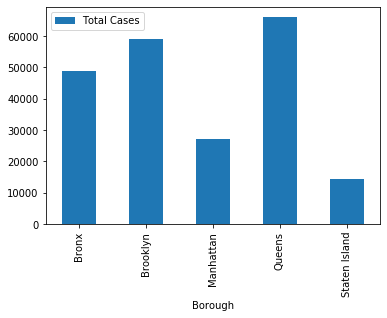

In [15]:
boro_total_bar = final.plot.bar(x = "Borough", y = "Total Cases")
boro_total_bar

KeyError: 'Average Household Income'

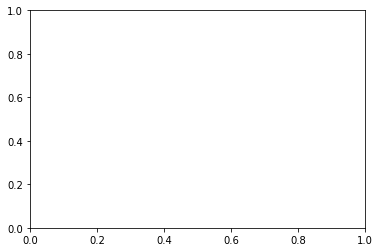

In [11]:
boro_total_scat = final.plot.scatter(x = "Average Household Income", y = "Total Cases")

#This is where the problem comes up